#**Kaggle : Medical Cost Personal Datasets**
###**Pau Carracelas Expósito**
###**1569293**

###**Explicació del Dataset**
Aquest dataset conté informació sobre asegurances mèdiques de diferentes regions amb els corresponents costs i les dades dels usuaris.

---


| # | NIU | kaggle|
|:-:|:-:|:--|
|	43	|	1569293	|https://www.kaggle.com/datasets/mirichoi0218/insurance||# 


---
**COLUMNES**

**age:** edat del beneficiari primari.

**sex:** genere de la persona que ha contractat la "insurance", female(dona), male(home). 

**bmi:** Índex de massa corporal (kg / m ^ 2).

**children:** Nombre de nens coverts per la "insurance" mèdica / Nombre de dependents.

**smoker:** Si el client fuma o no.

**region:** L'area residencial als EEUU del beneficiari, northeast (nord-est), southeast(sud-est), southwest(sud-oest), northwest(nord-oest). 

**charges:** Costs mèdics individuals facturats per la "insurance" de salut


In [18]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import svm, datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report,f1_score, precision_recall_curve,average_precision_score,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings("ignore")

In [3]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

db = pd.read_csv(url)

#**Exploratoy Data Analysis (EDA) & Preprocessing**

Primer de tot analitzem el nostre dataset. Mirem el nombre de files i columnes, els valors NaN que hi podem trobar, intentem detectar possibles outliers i mirem el tipus d'atributs que tenim (float, int, string, categòric, etc.) Sense tocar res i per a saber una mica més del nostre dataset, tenim que els atributs són:

---


Veient les columnes del dataset podem fer la hipòtesi de que l'atribut "charges", és a dir, el preu, tindrà un pes important sobre aquest anàlisi i probablement sigui l'atribut a predir que necessitarem.

In [4]:
print('\nNombre de files i columnes del dataset: ',db.shape) 


Nombre de files i columnes del dataset:  (1338, 7)


In [5]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
db["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Després d'extreure les primers conclusions, podem veure que no hem de manipular NaN's perquè no n'hi ha. També podem observar que tenim 3 atributs (sex, smoker i region) declarats com a objectes. Si el tipus es objecte al fer la matriu de correlacions son atributs que no ens apareixeran, per tant convertirem aquests atributs a tipus numèric per a que si es llegeixin.

In [9]:
label = LabelEncoder()
label.fit(db.sex.drop_duplicates()) 
db.sex = label.transform(db.sex)

label.fit(db.smoker.drop_duplicates()) 
db.smoker = label.transform(db.smoker)

label.fit(db.region.drop_duplicates()) 
db.region = label.transform(db.region)

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Un cop convertits a tipus numèric, mirem amb la funció info() que s'hagi canviat correctament i ara ja podrem veure la matriu de correlacions amb tots els atributs.


























Text(0.5, 1.0, 'Correlation ')

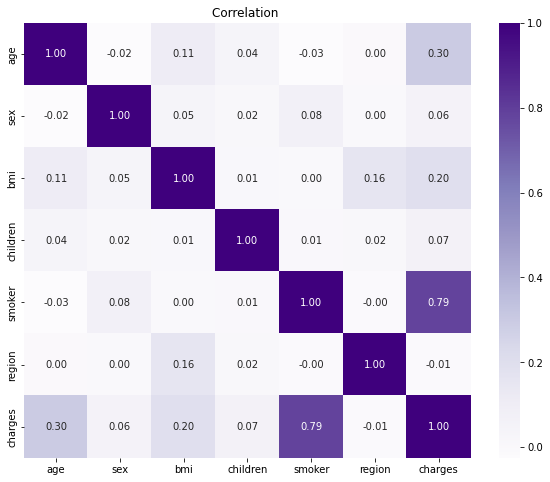

In [11]:
corr=db.corr()
fig = plt.figure(figsize=(10,8))
r = sns.heatmap(corr, cmap='Purples', annot=True,fmt=".2f")
r.set_title("Correlation ")

Veient la matriu de correlacions veiem que la nostra hipòtesi es compleix i que les majors correlacions les trobem relacionades amb "charges". Sobretot destaca la correlació amb els "smoker". Seguirem investigant una mica més el nostre dataset però veiem que aquí tenim una potencial font d'anàlisi/predicció a partir d'aquestes dues columnes.


---


Ara procedim a veure els histogrames dels diferents atributs per veure si hi ha distribucions gaussianes o algun altre tipus de dada que ens pugui semblar interessant.

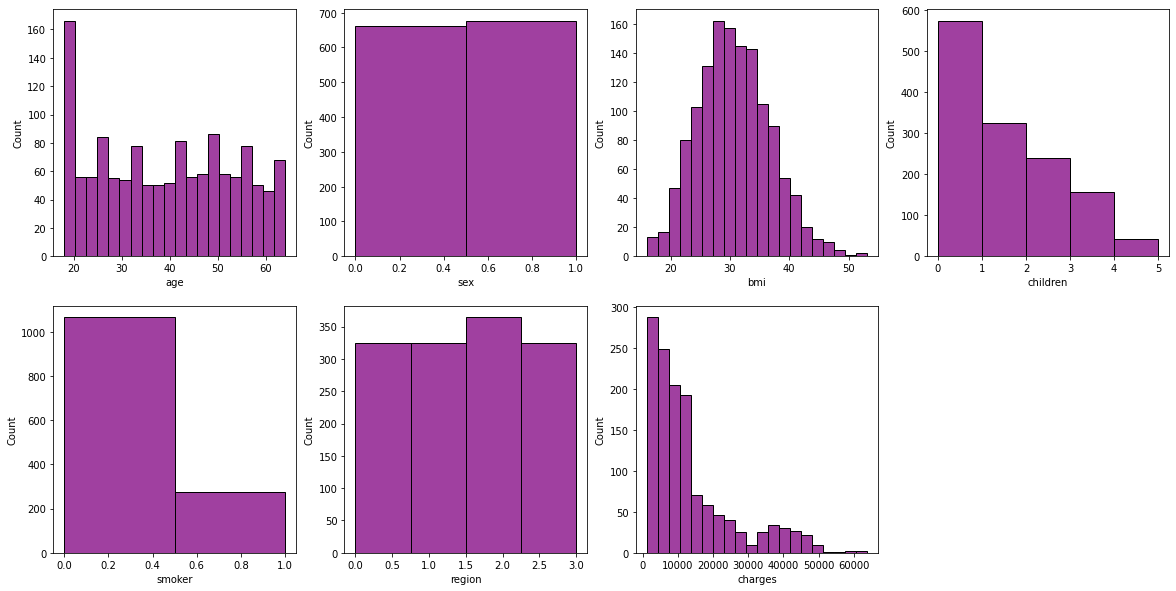

In [12]:
fig, axes = plt.subplots(2,4, figsize=(20,10))
sns.histplot(x=db['age'] , color='purple',ax=axes[0,0], bins=20)
sns.histplot(x=db['sex'] , color='purple',ax=axes[0,1], bins=2)
sns.histplot(x=db['bmi'] , color='purple',ax=axes[0,2], bins=20)
sns.histplot(x=db['children'] , color='purple',ax=axes[0,3], bins=5)
sns.histplot(x=db['smoker'] , color='purple',ax=axes[1,0], bins=2)
sns.histplot(x=db['region'] , color='purple',ax=axes[1,1], bins=4)
sns.histplot(x=db['charges'] , color='purple',ax=axes[1,2], bins=20)
fig.delaxes(axes[1,3])


A l'imprimir els histogràmes podem veure que la columna "bmi" o índex de massa corporal té una distribució gaussiana, per tant podria ser interessant també com a atribut a predir. També sorprén que hi ha una gran quantitat de gent menor de 20 anys amb una "insurance". A més a més podem veure que la distribució d'assegurances per regions es bastant similar per a totes igual que el nombre d'homes i dones, pràcticament el mateix. Així mateix podem destacar que hi ha molts més "no fumadors" que "fumadors".


---


Anem a seguir analitzant aquests 3 atributs (age, bmi, smoker) a partir de la columna "charges" ja que són els que més ens han cridat l'atenció. 

In [13]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Fem un head() per a comprovar com ens han quedat els atributs i a que correspón cada valor numèric dels nous que hem modificat per a quan imprimim els gràfics saber que és cada cosa. Pel que veiem, les Columens han quedat tal i que:

> **SEX:**
*   0=Female
*   1=Male

> **SMOKER:** 
*   0=No
*   1=Yes

> **REGION:**    
*   0=NorthEast
*   1=NorthWest
*   2=SouthEast
*   3=SouthWest

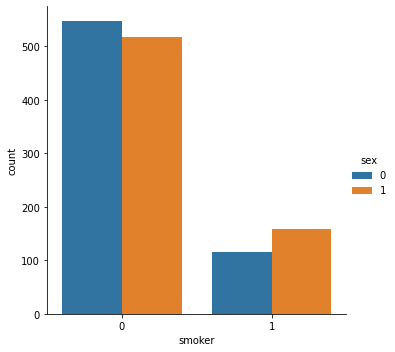

In [14]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=db)


Pel que veiem en aquest gràfic, no podem treure gaires conclusions, hi ha un nombre molt similar tan d'homes i dones fumadors com d'homes i dones no fumadors.

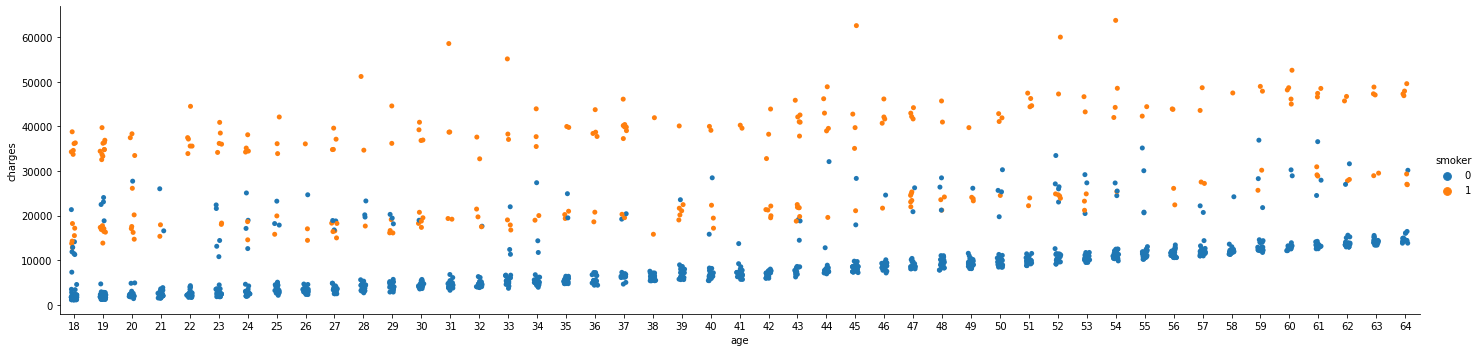

In [15]:
sns.catplot(x="age", y="charges",hue = 'smoker', height=5, aspect=4, data=db)

Aquesta gràfica si que és molt interessant perquè ens fa extreure conclusions vàlides sobre el dataset. I es que es veu molt clarament que el fumar o no afecta directament al preu que els usuaris de la "insurance" paguen. Com veiem, tots aquells no fumadors tenen uns càrrecs molt menors que els fumadors. També poder suposar que aquells "no fumadors" que tenen càrrecs més alts de lo normal és perquè tenen algún problema de salut molt més greu. 


---


Ara que hem vist que l'efecte fumar i els preus de la "insurance" tenen una gran importància dins del dataset, anem a basar el que queda del nostre anàlisi sobre aquests atributs.

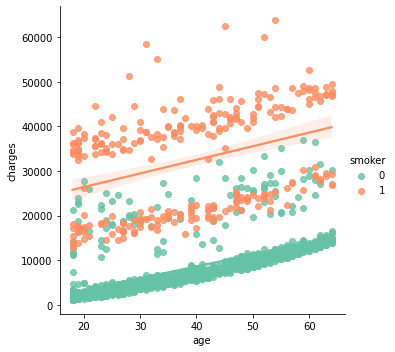

In [16]:
plot1 = sns.lmplot(x = 'age', y = 'charges', data=db, hue='smoker', palette='Set2')

Aquesta és la mateixa gràfica que l'anterior però més visual, podem veure perfectament on es situa la mitja (marcada per les línies) de preus de cadascuna de les categories. A diferència de l'anterior gràfic, també és veu de manera més clara que a mesura que incrementa l'edat, també incrementa el preu.

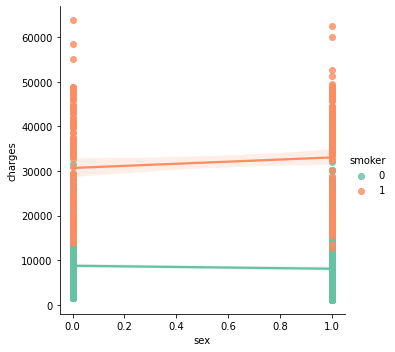

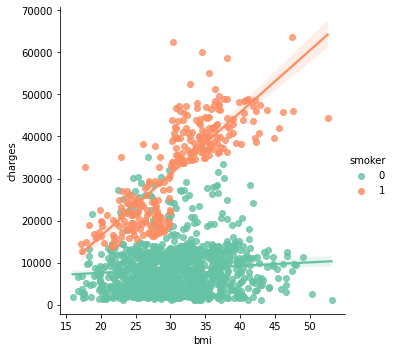

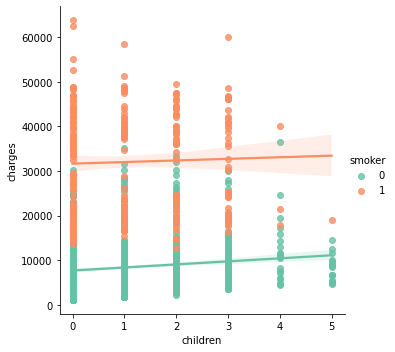

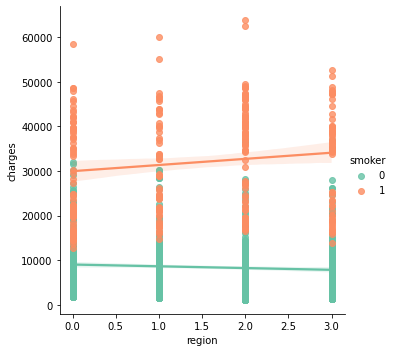

In [17]:
plot2 = sns.lmplot(x = 'sex', y = 'charges', data=db, hue='smoker', palette='Set2')
plot3 = sns.lmplot(x = 'bmi', y = 'charges', data=db, hue='smoker', palette='Set2')
plot4 = sns.lmplot(x = 'children', y = 'charges', data=db, hue='smoker', palette='Set2')
plot5 = sns.lmplot(x = 'region', y = 'charges', data=db, hue='smoker', palette='Set2')

Pel que fa a la resta de gràfiques tampoc ens són de moltissima útilitat. El que podem veure és que el "bmi" també afecta i com més índex de massa corporal tenen, més paguen, però aquesta dada només es veu reflectida dins dels usuaris fumadors, en canvi per als no fumadors no es veu alterada pràcticament. Una altra dada curiosa que podem veure és que la gent amb fills/varis fills, acostuma a fumar menys que aquells que no en tenen o en tenen pocs.


#**Regressions**

Després de totes les conclusions extretes a partir de l'EDA i el preprocessing, l'atribut a predir serà "charges" ja que com hem vist, aquest dataset gira tot entorn al preu de la "insurance". Amb atributs que poden tenir més impacte o menys però sempre interactuant sobre "charges".


---


El primer que farem serà fer l'split entre test i train.

In [113]:
x = db.drop('charges', axis = 1)
y = db['charges']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.3, random_state=123)


lazyReg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazyReg.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 42/42 [00:20<00:00,  2.06it/s]

[18:57:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4129.85,0.14
XGBRegressor,0.88,0.88,4130.70,0.05
LGBMRegressor,0.86,0.86,4505.52,0.06
HistGradientBoostingRegressor,0.85,0.86,4539.86,1.70
RandomForestRegressor,0.85,0.85,4554.36,0.30
AdaBoostRegressor,0.84,0.84,4717.84,0.03
BaggingRegressor,0.83,0.83,4901.98,0.04
KNeighborsRegressor,0.82,0.83,4968.04,0.02
ExtraTreesRegressor,0.82,0.82,5007.57,0.21


Fem servir LazyRegressor per a que ens mostri quins són els nostres possibles millors models i un cop tenim aquests resultats, anem a comparar varis dels models que ens ha donat amb millors resultats. Els models que compararem seran el GradientBoostingRegressor i el randomForestRegressor que són 2 dels models amb millors resultats i per últim mirarem el LinearRegressor. Encara que no té tan bons resultats com els 2 anteriors, el temps d'execució es pràcticament nul. Tot i així no crec que tingui gaire repercusió. Ja que generalment, si mirem els temps de la taula, aquests són molt baixos per a tots els regressors perquè tenim un dataset molt petit. Tant XGBRegressor, com LGBMRegressor i HistGradientBoostingRegressor	no els agafo perquè són tots diferents implementacions del GradientBoostingRegressor el qual ja seleccionem.

##**Linear Regression**

In [99]:
linearReg = LinearRegression().fit(x_train,y_train)
linearReg_train_predict = linearReg.predict(x_train)
linearReg_test_predict = linearReg.predict(x_test)


print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,linearReg_train_predict),
mean_squared_error(y_test,linearReg_test_predict)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,linearReg_train_predict),
r2_score(y_test,linearReg_test_predict)))

MSE train data: 37701626.609, MSE test data: 33913914.857
R2 train data: 0.745, R2 test data: 0.763


[Text(0.5, 0, 'Predicted Values')]

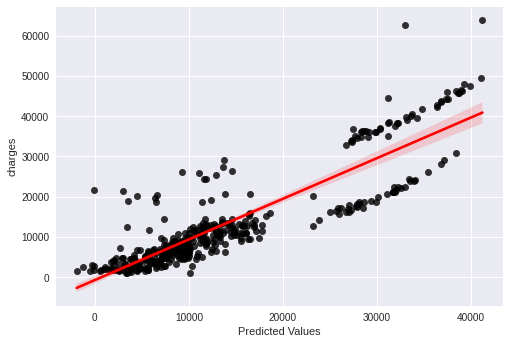

In [137]:
plot = sns.regplot(x=linearReg_test_predict, y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
plot.set(xlabel = "Predicted Values")

##**Gradient Boosting Regressor**

In [114]:
gradientReg = ensemble.GradientBoostingRegressor().fit(x_train,y_train)
gradientReg_train_predict = gradientReg.predict(x_train)
gradientReg_test_predict = gradientReg.predict(x_test)


print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,gradientReg_train_predict),
mean_squared_error(y_test,gradientReg_test_predict)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,gradientReg_train_predict),
r2_score(y_test,gradientReg_test_predict)))


MSE train data: 15073985.060, MSE test data: 17104304.826
R2 train data: 0.898, R2 test data: 0.880


[Text(0.5, 0, 'Predicted Values')]

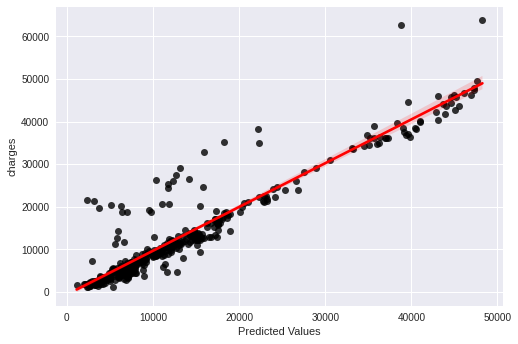

In [138]:
plot = sns.regplot(x=gradientReg_test_predict, y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
plot.set(xlabel = "Predicted Values")

##**Random Forest Regressor**

In [115]:
rfReg = ensemble.RandomForestRegressor().fit(x_train,y_train)
rfReg_train_predict = rfReg.predict(x_train)
rfReg_test_predict = rfReg.predict(x_test)


print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,rfReg_train_predict),
mean_squared_error(y_test,rfReg_test_predict)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,rfReg_train_predict),
r2_score(y_test,rfReg_test_predict)))

MSE train data: 3866432.193, MSE test data: 20415065.100
R2 train data: 0.974, R2 test data: 0.857


[Text(0.5, 0, 'Predicted Values')]

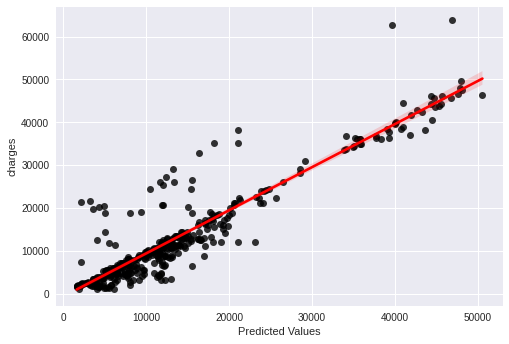

In [139]:
plot = sns.regplot(x=rfReg_test_predict, y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
plot.set(xlabel = "Predicted Values")

Com podem veure, el classificador lineal és el pitjor amb molta diferència. Després tenim el Random Forest i el Gradient Boosting que estàn molt parells en quant a resultats però considero que es millor el regressor Gradient Boosting ja que els resultats en quant a MSE i R2 entre train i test no varien tant com els que extreiem del Random Forest. Si ens fixem en les gràfiques també podem veure una petita millora per al Gradient Boosting respecte al RandomForest on podem veure valors que difereixen més de la mitja.

##**Cerca d'hiperparàmetres**

Busquem els millors hiperparàmetres per al nostre millor model amb un gridSearch. Un cop els tinguem comprovarem aviam si millora molt o no el nostre model inicial.

In [156]:
model_Log = ensemble.GradientBoostingRegressor(random_state = 123)

params = { 'learning_rate' : [0.01, 0.02, 0.03, 0.04],
            'subsample': [0.9, 0.5, 0.2, 0.1],
            'n_estimators': [100, 500, 1000, 1500],
            'max_depth': [4, 6, 8, 10]
}

search = GridSearchCV(estimator=model_Log, param_grid = params, n_jobs=-1, cv=5 )
result = search.fit(x_train,y_train)

print('Millor Score: %s' % search.best_score_)
print('Millors Hiperparàmetres: %s' % search.best_params_)




Millor Score: 0.8450874246371454
Millors Hiperparàmetres: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [157]:
gradientReg = ensemble.GradientBoostingRegressor(learning_rate = 0.04, subsample = 0.9, n_estimators = 100, max_depth = 4).fit(x_train,y_train)
gradientReg_train_predict = gradientReg.predict(x_train)
gradientReg_test_predict = gradientReg.predict(x_test)


print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,gradientReg_train_predict),
mean_squared_error(y_test,gradientReg_test_predict)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,gradientReg_train_predict),
r2_score(y_test,gradientReg_test_predict)))

MSE train data: 15735195.378, MSE test data: 16812058.178
R2 train data: 0.894, R2 test data: 0.882


Com podem veure, assignant els millors hiperparàmetres que ens ha donat, al nostre model de regressió, veiem que els resultats son pràcticament idèntics als que ens ha donat sense els hiperparàmetres. D'aquest fet en puc extreure diferents sospites. La primera és que algo no ha funcionat com debia i per aquest motiu no ens millora el model. La segona suposició que tinc és que quan executo el model de regressió predeterminat aquest ja agafa els millors hiperparàmetres i és per aquest motiu que els valors són practicament idèntics.

#**Conclusions**

Per a obtenir millors regressions i utilitzar classificadors hauria d'haver tractat els atributs sense convertir-los a atributs numèrics. Fent-ho d'aquesta manera (com ho he fet) ens serveix per a tenir un EDA més extens i més acurat, però a l'hora de tractar Regressors i Classificadors és millor tractar els atributs tal i com ens els donen per defecte ja que ens permetria, per exemple, fer regressions polinomials amb els diferents atributs que probablement ens haguessin donat millors resultats. És a dir, tractar els atributs de la manera que els hem tractat ens permet fer un anàlisi de dades més extens però ens limita a l'hora d'obtenir bones regressions i utilitzar classificadors.

#**Future Work**

Com bé he concretat a les conclusions, si en un futur apliqués més temps amb aquest dataset, caldria replicar amb una altra variable el dataset amb els "types" originals i utilitzar aquesta variable per a fer les regressions i aplicar els Classificadors i poder fer-ho de manera més extensa i precisa.
